## Classification Example

In [1]:
import os,sys
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_moons

import matplotlib
import matplotlib.pyplot as plt

In [2]:
print('python    ',sys.version.split()[0])
print('np        ',np.__version__)
print('pd        ',pd.__version__)
print('matplotlib',matplotlib.__version__)
print('sklearn   ',sklearn.__version__)

python     3.9.12
np         1.23.1
pd         1.4.3
matplotlib 3.5.2
sklearn    1.1.1


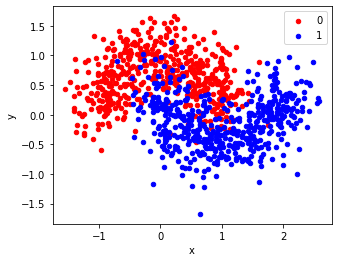

In [3]:
# generate 2d classification dataset
X, y = make_moons(n_samples=1000, noise=0.3)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}

fig, ax = plt.subplots(figsize=(5,4))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [4]:
print(X[:5])

[[ 0.86424479  0.60733284]
 [ 0.11027438  0.5575003 ]
 [-0.65567751  1.30592665]
 [ 0.84183902  1.0314642 ]
 [ 0.45934948 -0.43716456]]


In [5]:
print(y[:5])

[0 0 0 0 1]


In [6]:
print(df)

            x         y  label
0    0.864245  0.607333      0
1    0.110274  0.557500      0
2   -0.655678  1.305927      0
3    0.841839  1.031464      0
4    0.459349 -0.437165      1
..        ...       ...    ...
995  1.635933 -0.857325      1
996  0.374695 -0.019009      1
997 -1.176108  0.924245      0
998  0.829525 -0.223218      0
999  1.853758  0.318175      1

[1000 rows x 3 columns]


In [7]:
y1 = y[:,np.newaxis]
y1[:5]

array([[0],
       [0],
       [0],
       [0],
       [1]])

In [8]:
train_X, test_X, train_y, test_y = train_test_split(X,y[:,np.newaxis])
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(750, 2)
(750, 1)
(250, 2)
(250, 1)


In [9]:
model_rf = RandomForestClassifier()
model_rf.fit(train_X, np.ravel(train_y))

RandomForestClassifier()

In [10]:
y_pred = model_rf.predict(test_X)
print(y_pred)

[1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1
 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0
 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0
 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0]


In [11]:
#Calculate the confusion matrix itself
confusion = confusion_matrix(test_y, y_pred)
print(f"Confusion matrix:\n{confusion}")

Confusion matrix:
[[115  10]
 [ 15 110]]


In [12]:
test_y.shape

(250, 1)

Confusion matrix, without normalization
[[115  10]
 [ 15 110]]
Normalized confusion matrix
[[0.92 0.08]
 [0.12 0.88]]


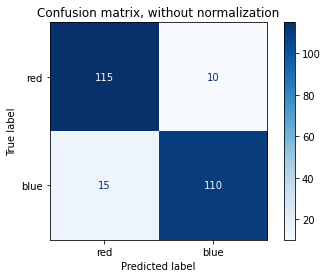

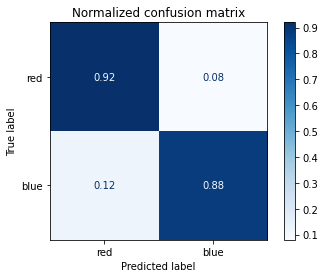

In [13]:
np.set_printoptions(precision=2)

title_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in title_options:
    display = ConfusionMatrixDisplay.from_estimator(
        model_rf,
        test_X,
        test_y,
        display_labels= ['red','blue'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    display.ax_.set_title(title)

    print(title)
    print(display.confusion_matrix)

plt.show()

In [14]:
y_proba = model_rf.predict_proba(test_X)[:,1]
fpr, tpr, thresholds = roc_curve(test_y ,y_proba)
auc = roc_auc_score(test_y ,y_proba)
print(f"roc_auc_score = {auc:.4f}")
#metrics.RocCurveDisplay(y1).plot()

roc_auc_score = 0.9472


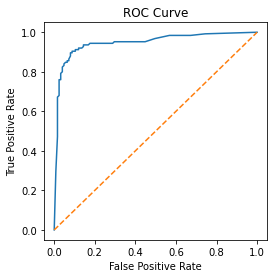

In [15]:
plt.subplots(1, figsize=(4,4))
plt.title('ROC Curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
#plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()